In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False
ds_repair = pd.read_csv("./부품수리시간.CSV",engine="python")
ds_repair

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


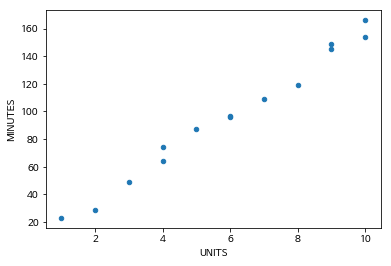

In [5]:
ds_repair.plot.scatter(x="UNITS",y="MINUTES")

In [6]:
ds_repair.corr(method = "pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [7]:
#X,Y 변수 역할 지정
ds_repair_x = ds_repair["UNITS"]
ds_repair_y = ds_repair["MINUTES"]
#회귀 모델에 상수 추가
ds_repair_x_const = sm.add_constant(ds_repair_x)
#회귀 분석
reg_model = sm.OLS(ds_repair_y,ds_repair_x_const)
reg_results = reg_model.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           8.92e-13
Time:                        09:40:01   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1617      3.355      1.240      0.2

C:\Users\admin1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


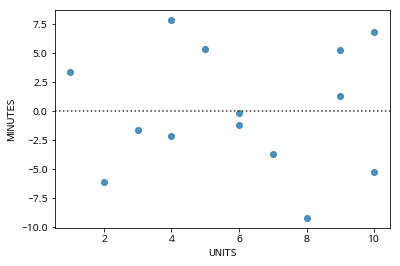

In [8]:
sns.residplot(ds_repair_x, ds_repair_y)

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([-1.75219161, -1.40175329, -1.05131497, -0.70087664, -0.70087664,
         -0.35043832,  0.        ,  0.        ,  0.35043832,  0.70087664,
          1.05131497,  1.05131497,  1.40175329,  1.40175329])),
 (1.0930552327010123, 3.172065784643304e-17, 0.9843861971111748))

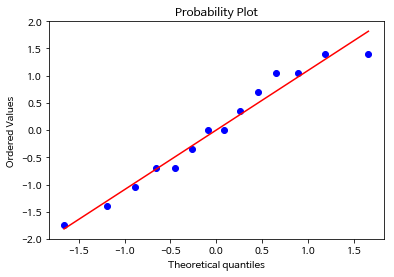

In [9]:
#정규화
obs = ds_repair_x.values
z = (obs-np.mean(obs))/np.std(obs)
#정규확률도
stats.probplot(z, dist="norm",plot=plt)

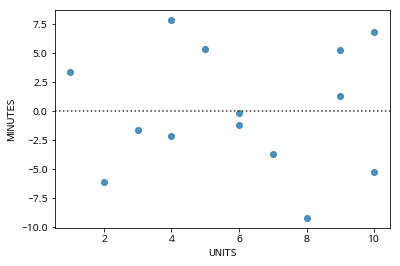

In [11]:
reg_model = sm.OLS(ds_repair_x,ds_repair_y)
reg_results.bse
sns.residplot(ds_repair_x,ds_repair_y)

In [14]:
res = pd.DataFrame(reg_results.resid)
res

,0
0,3.329574
1,-6.179198
2,-1.687970
3,-2.196742
4,7.803258
5,5.294486
6,-1.214286
7,-0.214286
8,-3.723058
9,-9.231830


In [18]:
obs = reg_results.resid
z=obs(obs-np.mean(obs))/np.std(obs)
stats.probplot(z,dist="norm",plot=plt)

TypeError: 'Series' object is not callable